In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [64]:
# profile of school account
df_profile = pd.read_csv("KYRC24_ACCT_Profile.csv")

In [65]:
# remove unnecessary columns and put focus on high schools only
df_profile = df_profile[(df_profile['Level'] == 'High School') & (df_profile['School Name']!= 'All Schools')]
df_profile = df_profile.drop(['School Year', 'County Number', 'District Number', 'School Number', 'School Code', 'State School Id', 'NCES Id', 'Co-Op', 'Co-Op Code','Federal Classification', 'Reason for Federal Classification', 'Feeder School'], axis=1)

In [66]:
# remove repetitive data
def remove_repeats(df):
    dropped = []
    for col in df_profile.columns:
        if 'CHANGE DIFFERENCE' in col:
            dropped.append(col)
    return df_profile.drop(dropped, axis = 1)
    
df_profile = remove_repeats(df_profile)

In [67]:
# extract dataframe with basic info about each school
df_basic = df_profile.filter(items=['County Name', 'District Name', 'School Name'])

In [68]:
# function for focusing data using single keyword
def focus_df (keyword):
    upper = keyword.upper()
    df_filtered = df_profile.filter(like=upper)
    return df_filtered

In [69]:
# create an empty list for user input to access info needed for plots
user_ints = []

In [70]:
# function for specifying a metric to consider, specifically referencing groupings in the data
def metric_spec (question, opt_list):
    opt_str = 'Enter '
    for option in opt_list:
        if opt_list.index(option) < (len(opt_list)-2):
            opt_str = opt_str + f'{int(opt_list.index(option)+1)} for {option}, '
        elif opt_list.index(option) < int(len(opt_list)-1) and len(opt_list) == 2:
            opt_str = opt_str + f'{int(opt_list.index(option)+1)} for {option} '
        elif opt_list.index(option) < int(len(opt_list)-1) and len(opt_list) > 2:
            opt_str = opt_str + f'{int(opt_list.index(option)+1)} for {option}, '
        else:
            opt_str = opt_str + f'or {int(opt_list.index(option)+1)} for {option}.'
    metric = int(input(f'{question} {opt_str}'))
    user_ints.append(metric)
    # limitation of using focus_df if you have same starting word for grouping, 
    # can't differentiate based on current code
    return focus_df(opt_list[metric-1].split()[0].strip(','))

In [71]:
# take user input for content focus
content = 'Which content area would you like to consider?'
content_list = ['Reading & Math', 'Science, Social Studies, & Writing']
df_met1 = metric_spec(content, content_list)

In [72]:
# take user focus for non-content focus
non_con = 'Which non-content specific metric would you like to consider?' 
non_con_list = ['Graduation', 'English Learners Progress', 'Quality of School Climate and Safety', 'Postsecondary']
df_met2 = metric_spec(non_con, non_con_list)
# print(user_ints)

In [73]:
# take user focus and join specific dataframes together for easier manipulation/visualization
df_joined = pd.concat([df_basic, df_met1, df_met2], axis = 1)
df_joined.head(50)
df_joined.to_csv('df_joined.csv', index=False)

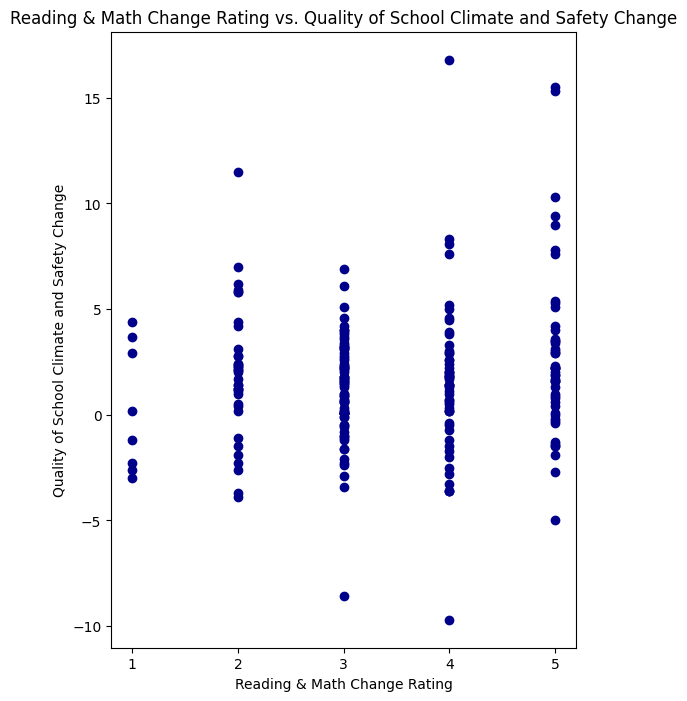

In [74]:
plt.figure(figsize=(6, 8))

# get correct data for x-axis based on user input
if user_ints[0]==1: 
    x = df_joined['READING_MATH CHANGE RATING']
elif user_ints[0]==2:
    x = df_joined['SCIENCE_SOCIAL STUDIES_COMBINED WRITING CHANGE RATING']

# get correct data for y-axis based on user input
if user_ints[1]==1:
    y = df_joined['GRADUATION CHANGE']
elif user_ints[1]==2:
    y = df_joined['ENGLISH LEARNERS PROGRESS CHANGE']
elif user_ints[1]==3:
    y = df_joined['QUALITY OF SCHOOL CLIMATE AND SAFETY CHANGE']
elif user_ints[1]==4:
    y = df_joined['POSTSECONDARY CHANGE']

# create scatter plot
plt.scatter(x, y, color = 'darkblue')

# limit x-axis values to 1 through 5
plt.xticks([1, 2, 3, 4, 5])

# add labels and title
plt.xlabel(content_list[user_ints[0]-1]+' Change Rating')
plt.ylabel(non_con_list[user_ints[1]-1]+' Change')
plt.title(content_list[user_ints[0]-1]+' Change Rating vs. '+non_con_list[user_ints[1]-1]+' Change')

# show plot
plt.show() 

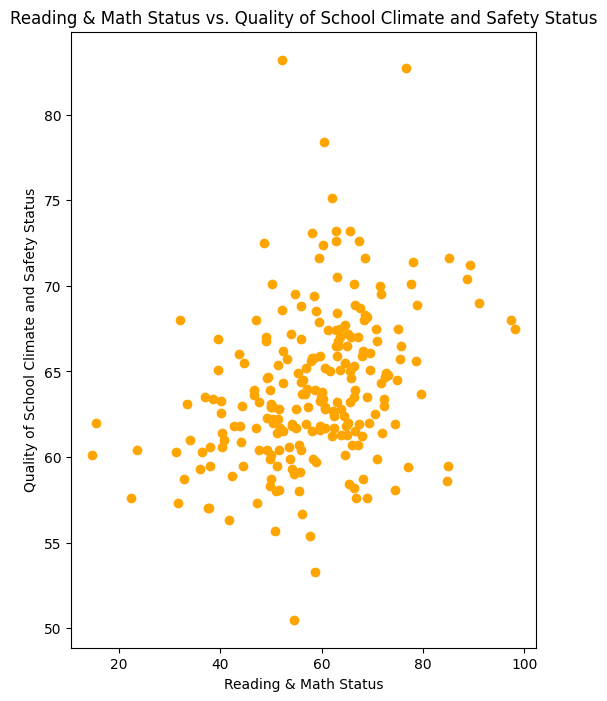

In [75]:
plt.figure(figsize=(6, 8))

# get correct data for x-axis based on user input
if user_ints[0]==1: 
    x = df_joined['READING_MATH STATUS']
elif user_ints[0]==2:
    x = df_joined['SCIENCE_SOCIAL STUDIES_COMBINED WRITING STATUS']

# get correct data for y-axis based on user input
if user_ints[1]==1:
    y = df_joined['GRADUATION STATUS']
elif user_ints[1]==2:
    y = df_joined['ENGLISH LEARNERS PROGRESS STATUS']
elif user_ints[1]==3:
    y = df_joined['QUALITY OF SCHOOL CLIMATE AND SAFETY STATUS']
elif user_ints[1]==4:
    y = df_joined['POSTSECONDARY STATUS']

# create scatter plot
plt.scatter(x, y, color = 'orange')

# add labels and title
plt.xlabel(content_list[user_ints[0]-1]+' Status')
plt.ylabel(non_con_list[user_ints[1]-1]+' Status')
plt.title(content_list[user_ints[0]-1]+' Status vs. '+non_con_list[user_ints[1]-1]+' Status')

# show plot
plt.show() 

In [76]:
# survey of school climate and safety
df_survey = pd.read_csv("KYRC24_ACCT_Survey_Results.csv")

/var/folders/d0/3zlvvs_x4kzc71htstg__9s40000gn/T/ipykernel_36526/1526677089.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_survey = pd.read_csv("KYRC24_ACCT_Survey_Results.csv")


In [77]:
# remove unnecessary columns
df_survey = df_survey.drop(['School Year', 'School Type', 'County Number', 'District Number', 'School Number', 'School Code', 'State School Id', 'NCES ID', 'CO-OP', 'CO-OP Code', 'Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Agree / Strongly Agree', 'Question Number'], axis=1)

In [78]:
# put focus on high schools only and question about student sense of belonging
df_belong = df_survey[(df_survey['Level'] == 'High School') & (df_survey['Demographic']== 'All Students') & (df_survey['School Name']!= 'All Schools') & (df_survey['Question']=='I feel like am part of my school.')]

In [79]:
# put focus on high schools only and question about student sense of safety
df_safe = df_survey[(df_survey['Level'] == 'High School') & (df_survey['Demographic']== 'All Students') & (df_survey['School Name']!= 'All Schools') & (df_survey['Question']=='I feel safe in my classes.')]

In [80]:
# career readiness indicators
df_career = pd.read_csv('KYRC24_CTE_Career_Readiness_Indicators.csv')

In [81]:
# remove unnecessary columns and put focus on high schools only
df_career = df_career.drop(['School Year', 'School Type', 'County Number', 'District Number', 'School Number', 'School Code', 'State School Id', 'NCES ID', 'CO-OP', 'CO-OP Code'], axis=1)
df_career = df_career[(df_career['School Name']!= 'All Schools')]

In [82]:
#remove schools with no indicators
for i in range(1,df_career.shape[0]):
    try:
        value1 = df_career.loc[i,'Industry Certification']
        if value1 == 0:
            value2 = df_career.loc[i,'CTE End-of-Program Assessment']
            if value2 == 0:
                value3 = df_career.loc[i,'Apprenticeship']
                if value3 == 0:
                    value4 = df_career.loc[i,'Dual Credit']
                    if value4 == 0:
                        value5 = df_career.loc[i,'More Than One Indicator']
                        if value5 == 0:
                            value6 = df_career.loc[i,'Work-Based Learning']
                            if value6 == 0:
                                df_career = df_career.drop(i)
    except KeyError:
        continue
# check the shape
# df_career.shape


In [83]:
# remove schools that are not in original list
list = []
school_names = df_profile['School Name'].tolist()
school_names2 = df_career['School Name'].tolist()
for i in school_names2:
    if i not in school_names:
        df_career = df_career.drop(df_career[df_career['School Name']==i].index)
# check the shape
# df_career.shape

In [84]:
# add columns to introduce meaningful ratios
df_career['Extreme Indicator Ratio'] = df_career['More Than One Indicator']/df_career['No Indicator']
df_career['Industry Cert Indicator'] = df_career['More Than One Indicator']/df_career['Industry Certification']
df_career.head()

,County Name,District Name,School Name,Industry Certification,CTE End-of-Program Assessment,Apprenticeship,Dual Credit,More Than One Indicator,No Indicator,Work-Based Learning,Extreme Indicator Ratio,Industry Cert Indicator
2,ADAIR,Adair County,Adair County High School,86,44,0,76,62,48,0,1.291667,0.720930
5,ALLEN,Allen County,Allen County-Scottsville High School,97,75,0,80,77,29,1,2.655172,0.793814
8,ANDERSON,Anderson County,Anderson County High School,82,106,1,25,73,119,38,0.613445,0.890244
11,BOYD,Ashland Independent,Paul G. Blazer High School,100,78,0,57,75,87,0,0.862069,0.750000
13,BRACKEN,Augusta Independent,Augusta Independent School,4,9,0,7,4,3,0,1.333333,1.000000


In [85]:
# verify that all dataframes have the same number of rows, i.e. same number of schools
print (df_profile.shape)
print (df_belong.shape)
print (df_safe.shape)
print (df_career.shape)

(228, 43)
(228, 9)
(228, 9)
(228, 12)


In [86]:
# join all dataframes using SQLite
conn = sqlite3.connect(':memory:')

df_career.to_sql('df_career', conn, index=False, if_exists='replace')
df_belong.to_sql('df_belong', conn, index=False, if_exists='replace')
df_safe.to_sql('df_safe', conn, index=False, if_exists='replace')
df_profile.to_sql('df_profile', conn, index=False, if_exists='replace')

query = '''
SELECT *
FROM df_profile
JOIN df_career ON df_profile."School Name" = df_career."School Name"
JOIN df_belong ON df_profile."School Name" = df_belong."School Name"
JOIN df_safe ON df_profile."School Name" = df_safe."School Name"
'''
together = pd.read_sql_query(query, conn)

together.head()

,County Name,District Name,School Name,School Type,Level,READING_MATH STATUS,READING_MATH STATUS RATING,SCIENCE_SOCIAL STUDIES_COMBINED WRITING STATUS,SCIENCE_SOCIAL STUDIES_COMBINED WRITING STATUS RATING,GRADUATION STATUS,...,Question Index,County Name,District Name,School Name,Level,Question,Question Type,Demographic,Suppressed,Question Index
0,ADAIR,Adair County,Adair County High School,A1,High School,59.7,3,46.6,2.0,96.5,...,66.9,ADAIR,Adair County,Adair County High School,High School,I feel safe in my classes.,Safety,All Students,N,68.6
1,ALLEN,Allen County,Allen County-Scottsville High School,A1,High School,50.4,2,57.7,4.0,94.2,...,66.1,ALLEN,Allen County,Allen County-Scottsville High School,High School,I feel safe in my classes.,Safety,All Students,N,67.3
2,ANDERSON,Anderson County,Anderson County High School,A1,High School,64.4,3,56.8,4.0,94.3,...,64.3,ANDERSON,Anderson County,Anderson County High School,High School,I feel safe in my classes.,Safety,All Students,N,68.0
3,BALLARD,Ballard County,Ballard Memorial High School,A1,High School,74.8,4,53.8,3.0,91.5,...,70.1,BALLARD,Ballard County,Ballard Memorial High School,High School,I feel safe in my classes.,Safety,All Students,N,69.9
4,BARREN,Barren County,Barren County High School,A1,High School,60.6,3,50.4,3.0,97.5,...,64.4,BARREN,Barren County,Barren County High School,High School,I feel safe in my classes.,Safety,All Students,N,68.2


In [87]:
together.to_csv('together.csv', index=False)